Updated: 10/12/2020
    
Extracting behavior times. Also making text files for conditions. 
Confidence [x], 
low/ high p/e [], 
different type of difficulty [], 
responses []

#### Import Libraries, set functions

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import pandas as pd
from nltools import Design_Matrix
from pathlib import Path
sns.set_palette('muted') 
sns.set_style('darkgrid')

#### Import Data from Directory

In [2]:
run1 = "/Users/isaacmenchaca/Desktop/SNAPP/fMRI/behavior data/ja/Main_task_run1.mat"
run2 = "/Users/isaacmenchaca/Desktop/SNAPP/fMRI/behavior data/ja/Main_task_run2.mat"
run3 = "/Users/isaacmenchaca/Desktop/SNAPP/fMRI/behavior data/ja/Main_task_run3.mat"
run4 = "/Users/isaacmenchaca/Desktop/SNAPP/fMRI/behavior data/ja/Main_task_run4.mat"
run5 = "/Users/isaacmenchaca/Desktop/SNAPP/fMRI/behavior data/ja/Main_task_run5.mat"
run6 = "/Users/isaacmenchaca/Desktop/SNAPP/fMRI/behavior data/ja/Main_task_run6.mat"
MT_Localizer_run1 = "/Users/isaacmenchaca/Desktop/SNAPP/fMRI/behavior data/ja/MT_Localizer_run1.mat"

In [3]:
from BehavioralDataSNAPP import BehavioralData, plot_coh_conf

run1Behavioral = BehavioralData(run1, 'run1')
run2Behavioral = BehavioralData(run2, 'run2')
run3Behavioral = BehavioralData(run3, 'run3')
run4Behavioral = BehavioralData(run4, 'run4')
run5Behavioral = BehavioralData(run5, 'run5')
run6Behavioral = BehavioralData(run6, 'run6')
MT_locBehavioral = BehavioralData(MT_Localizer_run1, 'MT_Localizer_run1')

Relative to scanner (subtract scan time)

In [4]:
run1Behavioral.printTimes()
run2Behavioral.printTimes()
run3Behavioral.printTimes()
run4Behavioral.printTimes()
run5Behavioral.printTimes()
run6Behavioral.printTimes()
MT_locBehavioral.printTimes()

run1 scanner start time: 2230.691556
run1 block start time: 2247.692986
run1 exit time: 2679.303817

run2 scanner start time: 2805.704277
run2 block start time: 2822.705524
run2 exit time: 3246.595443

run3 scanner start time: 3331.993140
run3 block start time: 3348.994346
run3 exit time: 3773.613345

run4 scanner start time: 3839.338155
run4 block start time: 3856.339344
run4 exit time: 4284.078075

run5 scanner start time: 4382.719774
run5 block start time: 4399.720846
run5 exit time: 4837.926097

run6 scanner start time: 4964.704111
run6 block start time: 4981.705409
run6 exit time: 5405.560240

MT_Localizer_run1 scanner start time: 5699.929108
MT_Localizer_run1 block start time: 5713.730365
MT_Localizer_run1 exit time: 6272.929694



#### Make DataFrames for each run, adjust times with repect to scanner start and prior runs

* Onset time, in seconds, relative to the start of the scan;
* Duration of the trial, in seconds;

In [5]:
dataDict1 = {'mriTrialOnset (s)': run1Behavioral.getTrialOnset() - 
             run1Behavioral.getScannerStart()}
dataDict1['mriStimOnset (s)'] = run1Behavioral.getStimOnset() - \
             run1Behavioral.getScannerStart()
dataDict1['Stim Duration'] = run1Behavioral.getStimDuration()
dataDict1['coherence'] = run1Behavioral.getCoherence()
dataDict1['dotDensity'] = run1Behavioral.getDotDensity()
dataDict1['stimID'] = run1Behavioral.getStimID()
dataDict1['response'] = run1Behavioral.getSubjectResponse()
dataDict1['confidence rating (1,2,3,4)'] = run1Behavioral.getUserConfidenceRating()
dataDict1['correct'] = run1Behavioral.getCorrectResponseStatus()
run1 = pd.DataFrame(dataDict1)
run1

,mriTrialOnset (s),mriStimOnset (s),Stim Duration,coherence,dotDensity,stimID,response,"confidence rating (1,2,3,4)",correct
0,17.012826,18.121224,0.5,0.432100,3,1,0,1,0
1,21.688469,22.797082,0.5,1.000000,3,0,0,4,1
2,26.347651,28.098000,0.5,0.432100,1,1,1,1,1
3,31.648565,32.857124,0.5,0.188501,1,0,0,1,1
4,36.407737,38.949889,0.5,0.089480,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
75,409.672931,411.348290,0.5,0.520872,3,0,0,4,1
76,414.898844,416.507494,0.5,0.508855,3,0,0,4,1
77,420.058141,421.224997,0.5,0.497675,3,1,1,4,1
78,424.775624,427.109350,0.5,0.487219,3,0,0,4,1


In [6]:
dataDict2 = {'mriTrialOnset (s)': run2Behavioral.getTrialOnset() - \
             run2Behavioral.getScannerStart() 
            + run1Behavioral.getTransitionTime()}
dataDict2['mriStimOnset (s)'] = run2Behavioral.getStimOnset() - \
            run2Behavioral.getScannerStart() + run1Behavioral.getTransitionTime()
dataDict2['Stim Duration'] = run2Behavioral.getStimDuration()
dataDict2['coherence'] = run2Behavioral.getCoherence()
dataDict2['dotDensity'] = run2Behavioral.getDotDensity()
dataDict2['stimID'] = run2Behavioral.getStimID()
dataDict2['response'] = run2Behavioral.getSubjectResponse()
dataDict2['confidence rating (1,2,3,4)'] = run2Behavioral.getUserConfidenceRating()
dataDict2['correct'] = run2Behavioral.getCorrectResponseStatus()
run2 = pd.DataFrame(dataDict2)
run2

,mriTrialOnset (s),mriStimOnset (s),Stim Duration,coherence,dotDensity,stimID,response,"confidence rating (1,2,3,4)",correct
0,465.629565,467.138178,0.5,0.477394,3,1,1.0,4.0,1.0
1,470.688681,472.455621,0.5,0.521527,1,1,0.0,1.0,0.0
2,476.006272,477.806595,0.5,0.468125,3,0,0.0,4.0,1.0
3,481.357167,483.124285,0.5,0.587742,1,0,0.0,1.0,1.0
4,486.683296,488.583515,0.5,0.459350,3,1,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...
75,851.880664,853.039229,0.5,0.585112,1,1,1.0,1.0,1.0
76,856.589802,859.373661,0.5,0.578862,1,1,1.0,1.0,1.0
77,862.924245,864.357873,0.5,0.572859,1,0,0.0,1.0,1.0
78,867.908488,869.016992,0.5,0.400029,3,1,1.0,1.0,1.0


In [7]:
run2Behavioral.setTransitionTime(run1Behavioral)
run2Behavioral.getTransitionTime()

889.5034263200005

In [8]:
dataDict3 = {'mriTrialOnset (s)': run3Behavioral.getTrialOnset() - \
             run3Behavioral.getScannerStart()
            + run2Behavioral.getTransitionTime()}
dataDict3['mriStimOnset (s)'] = run3Behavioral.getStimOnset() - \
            run3Behavioral.getScannerStart() + run2Behavioral.getTransitionTime()
dataDict3['Stim Duration'] = run3Behavioral.getStimDuration()
dataDict3['coherence'] = run3Behavioral.getCoherence()
dataDict3['dotDensity'] = run3Behavioral.getDotDensity()
dataDict3['stimID'] = run3Behavioral.getStimID()
dataDict3['response'] = run3Behavioral.getSubjectResponse()
dataDict3['confidence rating (1,2,3,4)'] = run3Behavioral.getUserConfidenceRating()
dataDict3['correct'] = run3Behavioral.getCorrectResponseStatus()
run3 = pd.DataFrame(dataDict3)
run3

,mriTrialOnset (s),mriStimOnset (s),Stim Duration,coherence,dotDensity,stimID,response,"confidence rating (1,2,3,4)",correct
0,906.515984,908.241297,0.5,0.567027,1,1,1,1,1
1,911.791807,913.225480,0.5,0.567027,1,0,0,4,1
2,916.776043,918.076333,0.5,0.567027,1,0,1,1,0
3,921.626855,924.602441,0.5,0.392804,3,1,0,1,0
4,928.153057,929.720041,0.5,0.392804,3,0,0,3,1
...,...,...,...,...,...,...,...,...,...
75,1293.775781,1294.842663,0.5,0.392804,3,0,0,3,1
76,1298.393313,1300.410241,0.5,0.392804,3,0,0,3,1
77,1303.969291,1305.477881,0.5,0.567027,1,1,0,3,0
78,1309.028460,1310.362073,0.5,0.567027,1,0,0,3,1


In [9]:
run3Behavioral.setTransitionTime(run2Behavioral)
run3Behavioral.getTransitionTime()

1331.1236308900006

In [10]:
dataDict4 = {'mriTrialOnset (s)': run4Behavioral.getTrialOnset() - \
             run4Behavioral.getScannerStart()
            + run3Behavioral.getTransitionTime()}
dataDict4['mriStimOnset (s)'] = run4Behavioral.getStimOnset() - \
            run4Behavioral.getScannerStart() + run3Behavioral.getTransitionTime()
dataDict4['Stim Duration'] = run4Behavioral.getStimDuration()
dataDict4['coherence'] = run4Behavioral.getCoherence()
dataDict4['dotDensity'] = run4Behavioral.getDotDensity()
dataDict4['stimID'] = run4Behavioral.getStimID()
dataDict4['response'] = run4Behavioral.getSubjectResponse()
dataDict4['confidence rating (1,2,3,4)'] = run4Behavioral.getUserConfidenceRating()
dataDict4['correct'] = run4Behavioral.getCorrectResponseStatus()
run4 = pd.DataFrame(dataDict4)
run4

,mriTrialOnset (s),mriStimOnset (s),Stim Duration,coherence,dotDensity,stimID,response,"confidence rating (1,2,3,4)",correct
0,1348.138938,1350.030929,0.5,0.450075,3,1,1,1,1
1,1353.589728,1355.640237,0.5,0.450075,3,0,0,4,1
2,1359.199090,1360.482631,0.5,0.450075,3,1,1,1,1
3,1364.033298,1365.875309,0.5,0.450075,3,0,0,3,1
4,1369.434180,1370.742754,0.5,0.450075,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...
75,1737.257418,1738.849407,0.5,0.606685,1,1,0,1,0
76,1742.399959,1745.225509,0.5,0.606685,1,0,0,1,1
77,1748.776114,1750.243101,0.5,0.606685,1,0,0,3,1
78,1753.793645,1755.468934,0.5,0.450075,3,1,0,1,0


In [11]:
run4Behavioral.setTransitionTime(run3Behavioral)
run4Behavioral.getTransitionTime()

1775.8635511650004

In [12]:
dataDict5 = {'mriTrialOnset (s)': run5Behavioral.getTrialOnset() - \
             run5Behavioral.getScannerStart()
            + run4Behavioral.getTransitionTime()}
dataDict5['mriStimOnset (s)'] = run5Behavioral.getStimOnset() - run5Behavioral.getScannerStart() + run4Behavioral.getTransitionTime()
dataDict5['Stim Duration'] = run5Behavioral.getStimDuration()

dataDict5['coherence'] = run5Behavioral.getCoherence()
dataDict5['dotDensity'] = run5Behavioral.getDotDensity()
dataDict5['stimID'] = run5Behavioral.getStimID()
dataDict5['response'] = run5Behavioral.getSubjectResponse()
dataDict5['confidence rating (1,2,3,4)'] = run5Behavioral.getUserConfidenceRating()
dataDict5['correct'] = run5Behavioral.getCorrectResponseStatus()
run5 = pd.DataFrame(dataDict5)
run5

,mriTrialOnset (s),mriStimOnset (s),Stim Duration,coherence,dotDensity,stimID,response,"confidence rating (1,2,3,4)",correct
0,1792.876394,1794.534935,0.5,0.516751,3,1,1,1,1
1,1798.085482,1799.560780,0.5,0.700460,1,0,0,2,1
2,1803.111424,1804.786740,0.5,0.700460,1,1,1,3,1
3,1808.345645,1809.904348,0.5,0.516751,3,1,1,2,1
4,1813.454842,1814.763425,0.5,0.700460,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...
75,2191.554915,2193.438635,0.5,0.700460,1,1,1,1,1
76,2196.989209,2198.831237,0.5,0.700460,1,0,0,3,1
77,2202.381845,2204.915645,0.5,0.700460,1,0,0,2,1
78,2208.466187,2209.541462,0.5,0.516751,3,1,1,1,1


In [13]:
run5Behavioral.setTransitionTime(run4Behavioral)
run5Behavioral.getTransitionTime()

2231.069874700001

In [14]:
dataDict6 = {'mriTrialOnset (s)': run6Behavioral.getTrialOnset() - \
             run6Behavioral.getScannerStart()
            + run5Behavioral.getTransitionTime()}
dataDict6['mriStimOnset (s)'] = run6Behavioral.getStimOnset() - \
run6Behavioral.getScannerStart() + run5Behavioral.getTransitionTime()
dataDict6['Stim Duration'] = run6Behavioral.getStimDuration()

dataDict6['coherence'] = run6Behavioral.getCoherence()
dataDict6['dotDensity'] = run6Behavioral.getDotDensity()
dataDict6['stimID'] = run6Behavioral.getStimID()
dataDict6['response'] = run6Behavioral.getSubjectResponse()
dataDict6['confidence rating (1,2,3,4)'] = run6Behavioral.getUserConfidenceRating()
dataDict6['correct'] = run6Behavioral.getCorrectResponseStatus()
run6 = pd.DataFrame(dataDict6)
run6

,mriTrialOnset (s),mriStimOnset (s),Stim Duration,coherence,dotDensity,stimID,response,"confidence rating (1,2,3,4)",correct
0,2248.084391,2250.109646,0.5,0.693638,1,1,1,1,1
1,2253.660268,2255.418853,0.5,0.693638,1,1,0,1,0
2,2258.977914,2260.786464,0.5,0.539471,3,1,1,2,1
3,2264.337141,2265.820713,0.5,0.539471,3,1,1,1,1
4,2269.371336,2270.404801,0.5,0.539471,3,0,0,2,1
...,...,...,...,...,...,...,...,...,...
75,2634.527483,2636.444532,0.5,0.539471,3,0,0,3,1
76,2639.995006,2641.086853,0.5,0.539471,3,1,1,2,1
77,2644.637548,2645.854433,0.5,0.693638,1,1,0,1,0
78,2649.405001,2651.263682,0.5,0.693638,1,0,0,3,1


#### Concatenate DataFrames and plot time

In [15]:
combinedRuns = pd.concat([run1, run2, run3, run4, run5, run6], ignore_index=True)
combinedRuns

,mriTrialOnset (s),mriStimOnset (s),Stim Duration,coherence,dotDensity,stimID,response,"confidence rating (1,2,3,4)",correct
0,17.012826,18.121224,0.5,0.432100,3,1,0.0,1.0,0.0
1,21.688469,22.797082,0.5,1.000000,3,0,0.0,4.0,1.0
2,26.347651,28.098000,0.5,0.432100,1,1,1.0,1.0,1.0
3,31.648565,32.857124,0.5,0.188501,1,0,0.0,1.0,1.0
4,36.407737,38.949889,0.5,0.089480,1,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
475,2634.527483,2636.444532,0.5,0.539471,3,0,0.0,3.0,1.0
476,2639.995006,2641.086853,0.5,0.539471,3,1,1.0,2.0,1.0
477,2644.637548,2645.854433,0.5,0.693638,1,1,0.0,1.0,0.0
478,2649.405001,2651.263682,0.5,0.693638,1,0,0.0,3.0,1.0


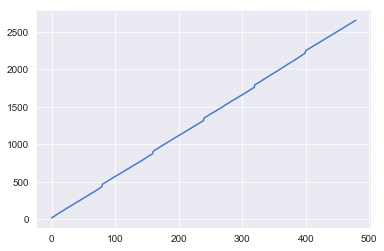

In [16]:
plt.plot(combinedRuns['mriStimOnset (s)'])

#### Observe confidence based on coherence and dot density

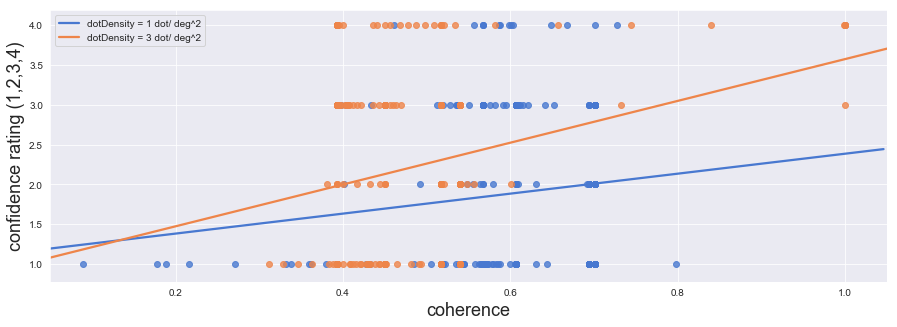

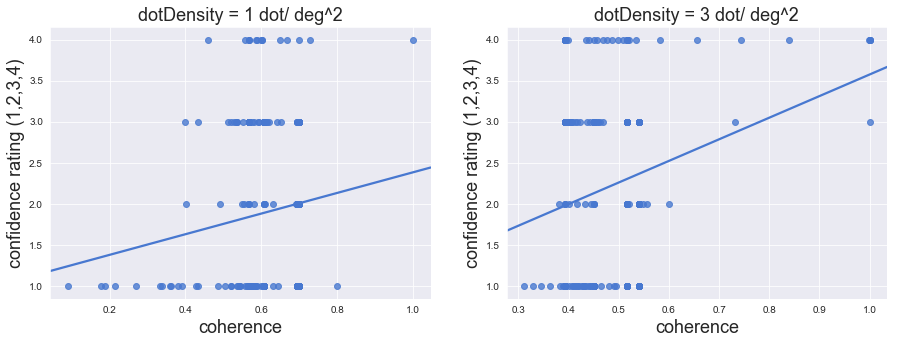

In [17]:
plot_coh_conf(combinedRuns)

#### Quick visualization of conditions

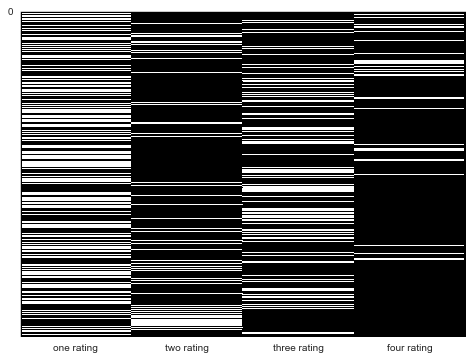

In [18]:
one_com = combinedRuns['confidence rating (1,2,3,4)'] == 1
two_com = combinedRuns['confidence rating (1,2,3,4)'] == 2
three_com = combinedRuns['confidence rating (1,2,3,4)'] == 3
four_com = combinedRuns['confidence rating (1,2,3,4)'] == 4

heatMap = {'one rating': one_com}
heatMap['two rating'] = two_com
heatMap['three rating'] = three_com
heatMap['four rating'] = four_com
heatMap_df = pd.DataFrame(heatMap)

TR = 2.0
dm = Design_Matrix(heatMap_df, sampling_freq=1/TR)
dm.heatmap()

#### Save .txt files for different confidence levels for GLM

In [19]:
oneConf_dict = {'Onset': combinedRuns['mriTrialOnset (s)'][one_com]}
oneConf_dict['Duration'] = combinedRuns['Stim Duration'][one_com]

twoConf_dict = {'Onset': combinedRuns['mriTrialOnset (s)'][two_com]}
twoConf_dict['Duration'] = combinedRuns['Stim Duration'][two_com]

threeConf_dict = {'Onset': combinedRuns['mriTrialOnset (s)'][three_com]}
threeConf_dict['Duration'] = combinedRuns['Stim Duration'][three_com]

fourConf_dict = {'Onset': combinedRuns['mriTrialOnset (s)'][four_com]}
fourConf_dict['Duration'] = combinedRuns['Stim Duration'][four_com]


oneConf_df = pd.DataFrame(oneConf_dict)
twoConf_df = pd.DataFrame(twoConf_dict)
threeConf_df = pd.DataFrame(threeConf_dict)
fourConf_df = pd.DataFrame(fourConf_dict)

display(oneConf_df.head(5))
display(twoConf_df.head(5))
display(threeConf_df.head(5))
display(fourConf_df.head(5))

,Onset,Duration
0,17.012826,0.5
2,26.347651,0.5
3,31.648565,0.5
4,36.407737,0.5
7,54.894310,0.5


,Onset,Duration
19,118.655412,0.5
34,195.777241,0.5
36,206.429003,0.5
37,211.071537,0.5
38,216.372457,0.5


,Onset,Duration
8,60.411954,0.5
14,92.584222,0.5
15,98.818567,0.5
18,113.221112,0.5
20,123.272946,0.5


,Onset,Duration
1,21.688469,0.5
5,42.500471,0.5
6,48.809958,0.5
10,70.496998,0.5
17,108.495323,0.5


In [20]:
with open('oneConf_FSL.txt', 'w') as f:
    for onset, duration in zip(oneConf_df['Onset'], oneConf_df['Duration']):
        f.write(str(onset))
        f.write(' ')
        f.write(str(duration))
        f.write(' ')
        f.write('1.0')
        f.write('\n')
            
with open('twoConf_FSL.txt', 'w') as f:
    for onset, duration in zip(twoConf_df['Onset'], twoConf_df['Duration']):
        f.write(str(onset))
        f.write(' ')
        f.write(str(duration))
        f.write(' ')
        f.write('1.0')
        f.write('\n')
    
with open('threeConf_FSL.txt', 'w') as f:
    for onset, duration in zip(threeConf_df['Onset'], threeConf_df['Duration']):
        f.write(str(onset))
        f.write(' ')
        f.write(str(duration))
        f.write(' ')
        f.write('1.0')
        f.write('\n')
    
with open('fourConf_FSL.txt', 'w') as f:
    for onset, duration in zip(fourConf_df['Onset'], fourConf_df['Duration']):
        f.write(str(onset))
        f.write(' ')
        f.write(str(duration))
        f.write(' ')
        f.write('1.0')
        f.write('\n')